In [1]:
aliginingwithArousal = [
 "shhs1-200094_ds.npy"
,"shhs1-200245_ds.npy"
,"shhs1-200291_ds.npy"
,"shhs1-200312_ds.npy"
,"shhs1-200387_ds.npy"
,"shhs1-200860_ds.npy"
,"shhs1-200641_ds.npy"
,"shhs1-200668_ds.npy"
,"shhs1-200692_ds.npy"
,"shhs1-200759_ds.npy"
,"shhs1-201234_ds.npy"
,"shhs1-201277_ds.npy"
,"shhs1-201284_ds.npy"
,"shhs1-201343_ds.npy"
,"shhs1-201199_ds.npy"
,"shhs1-201565_ds.npy"
,"shhs1-201632_ds.npy"
,"shhs1-201852_ds.npy"
,"shhs1-201678_ds.npy"
,"shhs1-201716_ds.npy"
,"shhs1-201756_ds.npy"
,"shhs1-202055_ds.npy"
,"shhs1-202310_ds.npy"
,"shhs1-202393_ds.npy"
,"shhs1-202152_ds.npy"
,"shhs1-202438_ds.npy"
,"shhs1-202559_ds.npy"
,"shhs1-202405_ds.npy"
,"shhs1-202503_ds.npy"
,"shhs1-202712_ds.npy"
,"shhs1-202558_ds.npy"
,"shhs1-202622_ds.npy"
,"shhs1-202763_ds.npy"
,"shhs1-202717_ds.npy"
,"shhs1-202849_ds.npy"
,"shhs1-202916_ds.npy"
,"shhs1-202986_ds.npy"
,"shhs1-203001_ds.npy"
,"shhs1-203089_ds.npy"
,"shhs1-203115_ds.npy"
,"shhs1-203139_ds.npy"
,"shhs1-203196_ds.npy"
,"shhs1-203307_ds.npy"
,"shhs1-203355_ds.npy"
,"shhs1-203521_ds.npy"
,"shhs1-203418_ds.npy"
,"shhs1-203571_ds.npy"
,"shhs1-203432_ds.npy"
,"shhs1-203645_ds.npy"
,"shhs1-203677_ds.npy"
,"shhs1-203567_ds.npy"
,"shhs1-203684_ds.npy"
,"shhs1-203589_ds.npy"
,"shhs1-203592_ds.npy"
,"shhs1-203763_ds.npy"
,"shhs1-203705_ds.npy"
,"shhs1-203766_ds.npy"
,"shhs1-203846_ds.npy"
,"shhs1-203864_ds.npy"
,"shhs1-203827_ds.npy"
,"shhs1-204014_ds.npy"
,"shhs1-204039_ds.npy"
,"shhs1-204065_ds.npy"
,"shhs1-204097_ds.npy"
,"shhs1-204079_ds.npy"
,"shhs1-204089_ds.npy"
,"shhs1-204144_ds.npy"
,"shhs1-204236_ds.npy"
,"shhs1-204269_ds.npy"
,"shhs1-204268_ds.npy"
                      ]

# lookingSection = "Respiratory"
lookingSection = "Arousal"
lookingSection


import os
# import pyedflib
import argparse
import statistics
import numpy as np
import scipy.signal 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import time
import scipy.interpolate

import pandas as pd
col_list = ["a"]

t1 = time.time()


df = pd.read_csv("C:/Users/Bpradsad/Desktop/data/SaO2/norm_sparkremoverAVG_full50_STFT_n/htnderv_s2_n.csv", usecols=["a","b"])
## shhs1-200001
file_n = []
for i in df["a"]:
    file_n.append(f"{i}")

df = pd.read_csv("C:/Users/Bpradsad/Desktop/data/SaO2/norm_sparkremoverAVG_full50_STFT_n/htnderv_s2_n.csv", usecols=["a","b"])
## shhs1-200001
label_n = []
for i in df["b"]:
#     print(df["b"])
    label_n.append(f"{i}")

import os.path
file_nn = []
label_nn = []

for i, patient in enumerate(file_n):
    file_exist = os.path.exists('D:/Directory_D_Desk_jup/Raw_npy/Signal_SaO2_OX_'+lookingSection+"/"+patient)
    if file_exist == True and patient not in aliginingwithArousal:
        file_nn.append(patient)
        label_nn.append(int(label_n[i]))
        
    if file_exist == False:
#         print(patient)
        pass
#         print(patient)




D_len = {}
tempp = []
for counter, patient in enumerate(file_nn, 0):
    p = []
    temp = np.load('D:/Directory_D_Desk_jup/Raw_npy/Signal_SaO2_OX_'+lookingSection+"/"+patient)
    D_len[patient[:-7]] = len(temp)//30
    tempp.append(len(temp)//30)
np.cumsum(tempp)



import math

df = pd.read_csv("C:/Features/time_6_"+lookingSection+"_segmented/htnderv_s2_nnn.csv", usecols=["a","b"])
df = df.dropna(axis=0)
# ## shhs1-200001
file_n = []
label_n = []
indexconsider = []
cnt = 0
for i,j in zip(df["a"],df["b"]):
    if i[:12]+"_ds.npy" not in aliginingwithArousal:
        file_n.append(f"{i}")
        label_n.append(int(j))
        indexconsider.append(cnt)
    cnt += 1
#     file_n.append(f"{i}")
#     label_n.append(int(j))
#     indexconsider.append(cnt)



D_len = {}
tempp = []
for counter, patient in enumerate(file_nn, 0):
    p = []
    temp = np.load("D:/Directory_D_Desk_jup/Raw_npy/Signal_SaO2_OX_"+lookingSection+"/"+patient)
    D_len[patient[:-7]] = len(temp)//30
    tempp.append(len(temp)//30)

CUMSUM = np.cumsum(tempp)

t1 = time.time()


# ######################################################

X_train, y_train, X_test, y_test = [], [], [], []


t1 = time.time()

        

X = np.load("C:/Features/log_S.npy").reshape(240731,-1)
X = X[indexconsider]
X[np.isnan(X)] = 0





print(X.shape)

X_train = X[:CUMSUM[1400], :]
X_test = X[CUMSUM[1400]:, :]

for i, patient in enumerate(file_n):
#     temp = np.load("C:/Features/45_1_7_feature_"+lookingSection+"/"+patient).flatten()
    if i < CUMSUM[1400]:
#         X_train.append(list(temp))
        y_train.append(label_n[i])
    else:
#         X_test.append(list(temp))
        y_test.append(label_n[i])

#     print((time.time() - t1)/60)


X_tr  = X_train   
X_te = X_test 
y_tr = y_train 
y_te = y_test
# print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)
print(time.time() - t1)

CUMSUM_train = CUMSUM[:1400]
CUMSUM_new = CUMSUM - CUMSUM[1400]
CUMSUM_new = CUMSUM_new[1400:]


(240731, 512)
0.6707203388214111


acc 0.4771807578282227
predict_res [1 1 1 ... 0 0 0]
13307.807699918747
>>> 0.5207100591715976 0


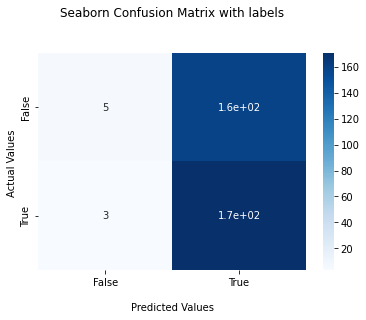

Accuracy 0.506623212783852


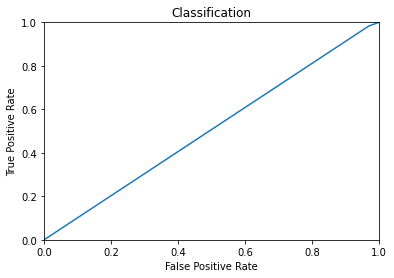

Acc_test 0.5207100591715976 ther 1
>>> 0.5207100591715976 0.5207100591715976


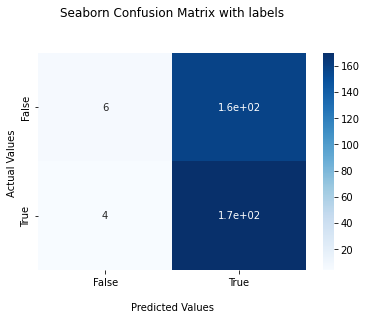

Accuracy 0.5067984300532661


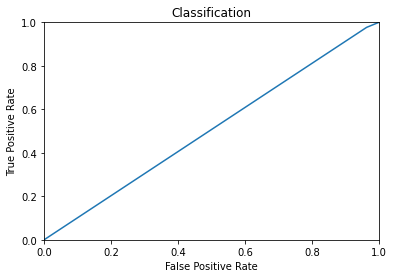

Acc_test 0.5207100591715976 ther 2
>>> 0.5177514792899408 0.5207100591715976
>>> 0.5207100591715976 0.5207100591715976


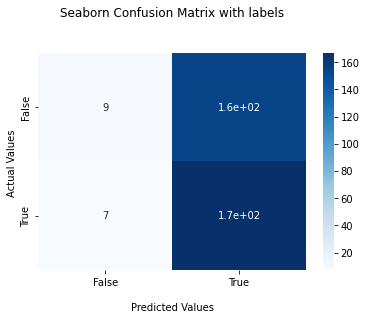

Accuracy 0.5073240818615083


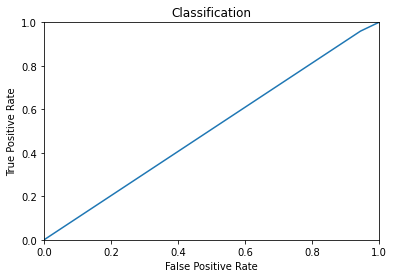

Acc_test 0.5207100591715976 ther 4
>>> 0.5207100591715976 0.5207100591715976


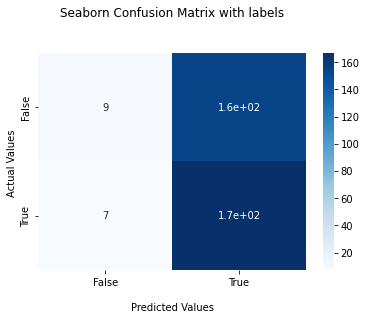

Accuracy 0.5073240818615083


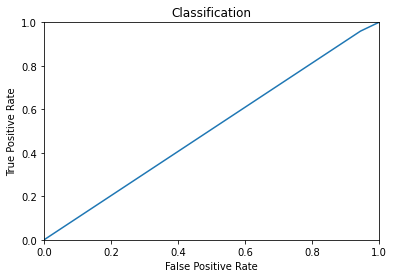

Acc_test 0.5207100591715976 ther 5
>>> 0.5207100591715976 0.5207100591715976


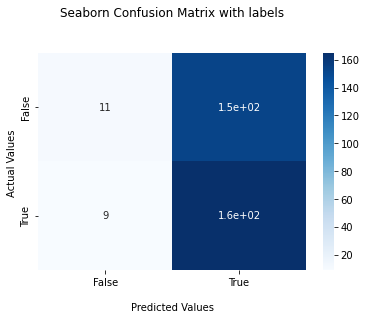

Accuracy 0.5076745164003365


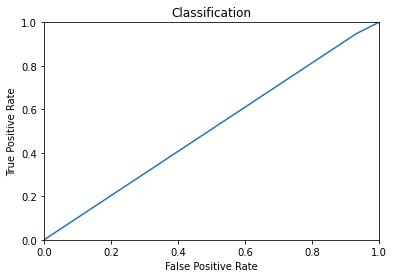

Acc_test 0.5207100591715976 ther 6
>>> 0.5059171597633136 0.5207100591715976
>>> 0.4970414201183432 0.5207100591715976
>>> 0.4970414201183432 0.5207100591715976
>>> 0.5088757396449705 0.5207100591715976
>>> 0.5088757396449705 0.5207100591715976
>>> 0.5088757396449705 0.5207100591715976
>>> 0.5029585798816568 0.5207100591715976
>>> 0.5029585798816568 0.5207100591715976
>>> 0.5059171597633136 0.5207100591715976
>>> 0.5 0.5207100591715976
>>> 0.4970414201183432 0.5207100591715976
>>> 0.4940828402366864 0.5207100591715976
>>> 0.4970414201183432 0.5207100591715976
>>> 0.4970414201183432 0.5207100591715976
>>> 0.5029585798816568 0.5207100591715976
>>> 0.5029585798816568 0.5207100591715976
>>> 0.5059171597633136 0.5207100591715976
>>> 0.5059171597633136 0.5207100591715976
>>> 0.5059171597633136 0.5207100591715976
>>> 0.5029585798816568 0.5207100591715976
>>> 0.4970414201183432 0.5207100591715976
>>> 0.4970414201183432 0.5207100591715976
>>> 0.4940828402366864 0.5207100591715976
>>> 0.49112426

In [2]:
##########################################################
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVM.fit(X_tr, y_tr)


# Predict on dataset which model has not seen before
print("acc", sum(SVM.predict(X_te) == y_te)/len(y_te))


# predict_res_train = SVM.predict(X_tr)
# print("predict_res_train", predict_res_train)
predict_res = SVM.predict(X_te)
print("predict_res", predict_res)

# predict_proba = SVM.predict_proba(X_te)
#     print((time.time() - t1)/60)

CUMSUM_train = CUMSUM[:1400]
CUMSUM_new = CUMSUM - CUMSUM[1400]
CUMSUM_new = CUMSUM_new[1400:]


# CUMSUM_new

darsadofONE = sum(y_test)/len(y_test)
print(time.time() - t1)



##################################################################################
def Confusion_pic(actual,y_pred_test, Thereshold, Acc, darsadofONE):
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc,roc_auc_score

    # cf1 = confusion_matrix(y_train, y_pred_train)
    
    cf1 = confusion_matrix(actual, y_pred_test)
    import seaborn as sns

    ax = sns.heatmap(cf1, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    #cf2
#     ax = sns.heatmap(cf2, annot=True, cmap='Blues')

#     ax.set_title('Confusion Matrix \n'+"#"+f"{Thereshold}"+"_"+"Acc:"+f"{round(Acc, 2)}"+"percent_1"+"__"+f"{round(darsadofONE, 2)}");
#     ax.set_xlabel('\nPredicted Values')
#     ax.set_ylabel('Actual Values');

#     ## Ticket labels - List must be in alphabetical order
#     ax.xaxis.set_ticklabels(['False','True'])
#     ax.yaxis.set_ticklabels(['False','True'])

#     ## Display the visualization of the Confusion Matrix.
#     plt.savefig("C:/Features/figsonlyfeatures59_/"+lookingSection+"_confusion/"+"#"+f"{Thereshold}"+"__"+"Acc"+f"{round(Acc, 2)}"+"percent_1"+"__"+f"{round(darsadofONE, 2)}"+".png")
#     plt.show()


    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(actual, y_pred_test)
        roc_auc[i] = auc(fpr[i], tpr[i])

    print("Accuracy", roc_auc_score(actual, y_pred_test))
    plt.figure()
    plt.plot(fpr[1], tpr[1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Classification')
    plt.savefig("C:/Features/figs_/"+"#"+f"{Thereshold}"+"auc"+".png")
    plt.show()
###########################################################################################################################################################################


    



#     if Acc_test >= best_acc:
#         best_acc = Acc_test
#         Confusion_pic(actual, y_pred_test, Thereshold, Acc, darsadofONE)

best_acc = 0
darsadofONE = sum(y_test)/len(y_test)


for ther in np.arange(1,300):
    Thereshold = ther
    y_pred_test = []
    y_pred_train = []
    actual_test = []
    actual_train = []
        
    NN=200
    
    for i in range(1, len(CUMSUM_new)-2):
 
        if sum(predict_res[CUMSUM_new[i]:CUMSUM_new[i+1]]) >= ther:
            predicted_label = 1
        else:
            predicted_label = 0

        actual_label = int(sum(y_test[CUMSUM_new[i]:CUMSUM_new[i+1]]) /len(y_test[CUMSUM_new[i]:CUMSUM_new[i+1]]))

        y_pred_test.append(predicted_label)
        actual_test.append(actual_label)

        
#     for i in range(len(CUMSUM[:1400])-2):
#         if sum(predict_res_train[CUMSUM[i]:CUMSUM[i+1]]) >= Thereshold:
#             predicted_label = 1
#         else:
#             predicted_label = 0

#         actual_label = int(sum(y_train[CUMSUM[i]:CUMSUM[i+1]]) /len(y_train[CUMSUM[i]:CUMSUM[i+1]]))

#         y_pred_train.append(predicted_label)
#         actual_train.append(actual_label) 
        
        

#         Confusion_pic(actual,y_pred_test, Thereshold, Acc, darsadofONE)
        

    Acc_test = sum(np.array(y_pred_test) == np.array(actual_test)) / len(actual_test)
#     Acc_train = sum(np.array(y_pred_train) == np.array(actual_train)) / len(actual_train)

    print(">>>", Acc_test, best_acc)
    if Acc_test >= best_acc:
        best_acc = Acc_test
        Confusion_pic(actual_test, y_pred_test, Thereshold, Acc_test, darsadofONE)
        print("Acc_test", Acc_test, "ther", ther)
        ttt = ther
        y_final_best = y_pred_test

print("time", time.time() - t1)

import numpy as np
np.save("C:/Features/SVM_SUBFEATURE_RES/log_S"+f"{ttt}", y_final_best)